In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
# sns.set_style("whitegrid")
plt.style.use('ggplot')

In [99]:
data = pd.read_excel('data/kpmg_data.xlsx', sheetname=1)

In [3]:
pd.set_option('max_columns', 200)
pd.set_option('max_rows', 200)
data.select_dtypes(exclude=[np.number]).head()

,Quest No,Age,Gender,Employment Category,Education,Income,Location,Bank,Most frequently used Bank,RatQOS,RatFS,RatIR,RatERSA,RatPOBR,RatRFF,FreqBra,FreqATM,FreqPOS,FreqInt,FreqMob,FreqUSSD,FreqTel,MostfreqATM,ATMproximity,ATMqon,ATMsecurity,ATMros,Device1,Device2,Device3,Device4,Cshwit,Cshdep,Fndtrf,Balenq,Mkgcmp,Mkgpay,Gtloan,Gtfnad,Bkfxdp,Cshwit2,Cshdep2,Fndtrf2,Balenq2,mkgcmp2,Mkgpay2,Gtloan2,Gtfnad2,Bkfxdp2,Payuticash,Payintcash,Paycabcash,Payuti,Payint,Paycab,Mig1,Mig2,Mig3,Rec,Changeplan,FromBank,ToBank,ChangeReasons
0,ABJ/2015/002/196,31-35,No Response,Civil/Public Servant,OND/HND,"N50,000 - N100,000",Abuja,Bank A,Bank A,Yes,NaN,NaN,NaN,NaN,NaN,Rarely,Monthly,Never,Never,Never,Never,Never,Bank A,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,ATM,Branch,ATM,ATM,Branch,Branch,No Response,Branch,No Response,ATM,Branch,ATM,ATM,Branch,POS,Branch,Branch,Branch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sometimes will,No,NaN,NaN,NaN
1,ABJ/2015/002/196,31-35,No Response,Civil/Public Servant,OND/HND,"N50,000 - N100,000",Abuja,Bank M,Bank A,NaN,NaN,NaN,NaN,Yes,NaN,Rarely,Monthly,Never,Never,Never,Never,Never,Bank A,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,ATM,Branch,ATM,ATM,Branch,Branch,No Response,Branch,No Response,ATM,Branch,ATM,ATM,Branch,POS,Branch,Branch,Branch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,No,NaN,NaN,NaN
2,KAN/2015/001/228,31-35,No Response,Self Employed,Bachelor's Decree,"Below N50,000",Kano,Bank J,Bank B,NaN,NaN,NaN,NaN,NaN,NaN,Monthly,Monthly,Never,Never,Never,At Least once a day,Never,Bank J,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ATM,Branch,ATM,ATM,No Response,ATM,No Response,Branch,No Response,Branch,Branch,Internet/Mobile Banking,Internet/Mobile Banking,Branch,Internet/Mobile Banking,Branch,Branch,Branch,Yes,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,Absolutely will,No,NaN,NaN,NaN
3,KAN/2015/001/228,31-35,No Response,Self Employed,Bachelor's Decree,"Below N50,000",Kano,Bank B,Bank B,NaN,NaN,NaN,NaN,NaN,NaN,Monthly,Monthly,Never,Never,Never,At Least once a day,Never,Bank J,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ATM,Branch,ATM,ATM,No Response,ATM,No Response,Branch,No Response,Branch,Branch,Internet/Mobile Banking,Internet/Mobile Banking,Branch,Internet/Mobile Banking,Branch,Branch,Branch,Yes,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,Often will,No,NaN,NaN,NaN
4,KAN/2015/04/061,21-30,Male,Private Sector Employee,Bachelor's Decree,"Below N50,000",Kano,Bank C,Bank C,Yes,Yes,NaN,NaN,NaN,Yes,Monthly,At least once a week,Rarely,Rarely,Rarely,Rarely,Never,Bank C,Yes,NaN,NaN,NaN,NaN,NaN,NaN,Yes,ATM,Branch,Branch,ATM,Branch,Branch,Branch,Branch,Branch,ATM,Branch,ATM,ATM,Internet/Mobile Banking,No Response,Branch,Internet/Mobile Banking,Internet/Mobile Banking,Yes,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,Often will,No,NaN,NaN,NaN


In [100]:
#reasons for maintaing banking relationship
quality = ['RatQOS', 'RatFS', 'RatIR', 'RatERSA','RatPOBR', 'RatRFF']

# data_quality = data[quality]

# data_quality.isnull().sum()

def encodeQuality(col_data):
    if col_data == 'Yes':
        return 1
    else:
        return 0
# for col_i in quality:
#     data_quality[col_i + 'encode'] = data_quality[col_i].apply(encodeQuality)
    
for col_i in quality:
    data[col_i + 'encode'] = data[col_i].apply(encodeQuality)
    data.drop(col_i, axis=1, inplace=True)

In [101]:
# ax = sns.countplot(x='Age', data=data_demo, hue='Income')
quality_encode = ['RatQOSencode', 'RatFSencode', 'RatIRencode', 'RatERSAencode','RatPOBRencode', 'RatRFFencode']
data[quality_encode]

def qualityToOne(df):
    if df['RatQOSencode'] == 1:
        return 'RatQOS'
    elif df['RatFSencode'] == 1:
        return 'RatFS'
    elif df['RatIRencode'] == 1:
        return 'RatIR'
    elif df['RatERSAencode'] == 1:
        return 'RatERSA'
    elif df['RatPOBRencode'] == 1:
        return 'RatPOBR'
    elif df['RatRFFencode'] == 1:
        return 'RatRFF'

data['banking_rtnship'] = data.apply(qualityToOne, axis=1)

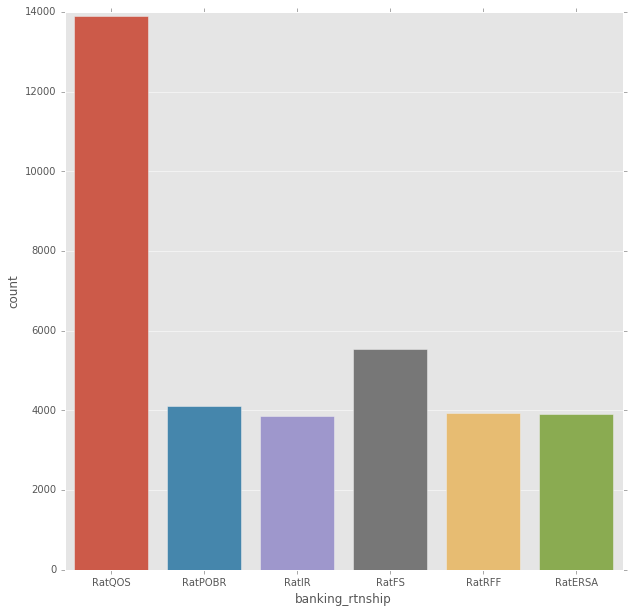

In [102]:
# data['banking_rtnship'].isnull().sum()
ax = sns.countplot(x='banking_rtnship', data=data)

In [7]:
def locationRecode(col):
    if col['Location'] in ('Lagos', 'Abeokuta', 'Akure', 'Ibadan', 'Ado-Ekiti', 'Osogbo'):
        return 'SW'
    elif col['Location'] in ('Aba', 'Asaba', 'Calabar', 'Enugu', 'Onitsha', 'Owerri', 'Port Harcourt', 'Uyo','Nnewi', 'Benin'):
        return 'SS/SE '
    elif col['Location'] in ('Abuja','Kano', 'Lokoja', 'Bauchi', 'Ilorin', 'Jos', 'Kaduna', 'Minna', 'Katsina','Makurdi', 'Nasarrawa', 'Sokoto', 'Yola'):
        return 'North'

data['location_re']=data.apply(locationRecode, axis=1)
data.drop('Location', axis=1, inplace=True)

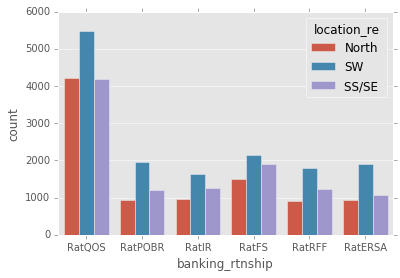

In [8]:
ax = sns.countplot(x='banking_rtnship', data=data, hue='location_re')

In [9]:
data.drop(quality_encode, axis=1, inplace=True)

In [10]:
def regroupAge(col):
    if col['Age'] == '21-30':
        return '18-30'
    if col['Age'] == '18-20':
        return '18-30'
    if col['Age'] == '31-35':
        return '31-40'
    if col['Age'] == '36-40':
        return '31-40'
    if col['Age'] == '41-60':
        return 'Above 41'
    if col['Age'] == 'Above 60':
        return 'Above 41'
    
data['Age_regroup'] = data.apply(regroupAge, axis=1)


In [11]:
data.drop('Age', axis=1, inplace=True)

[u'Rarely' u'Monthly' u'No Response' u'At least once a week'
 u'At Least once a day' u'Never' nan]


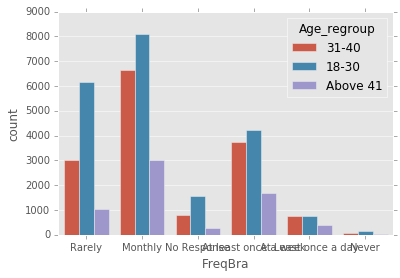

In [12]:
print data['FreqBra'].unique()
sns.countplot(x='FreqBra', data=data, hue='Age_regroup')

In [103]:
def device_encode(col):
    if col['Device1'] == 'Yes':
        return 'desktop'
    elif col['Device2'] == 'Yes':
        return 'laptop'
    elif col['Device3'] == 'Yes':
        return 'tablet'
    elif col['Device4'] =='Yes':
        return 'smartphone'

data['device_used'] = data.apply(device_encode, axis=1)

col_devices = ['Device1', 'Device2', 'Device3', 'Device4']

data.drop(col_devices, axis=1, inplace=True)

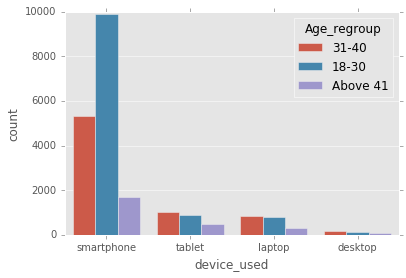

In [14]:
sns.countplot(x='device_used', data=data, hue='Age_regroup')

In [15]:
# data['Cshwit'].plot.pie()
from __future__ import division

device_ = pd.crosstab(index=data['device_used'], columns='count')
device_.columns = ['total_d']
device_.index= ['desktop', 'laptop', 'smartphone', 'tablet']
# device_[]


In [16]:
# data['FreqBra'].unique()
# data['FreqBra_encode'] = data['FreqBra']
# recoded_values = {'FreqBra_encode':{'No Response':0, 'Never':1, 'Rarely':2, 
#                                     'Monthly':3, 'At least once a week':4,
#                                    'At Least once a day':5}}
# data.replace(recoded_values, inplace=True)

def frequency_encode(col):
    data[col + '_encode'] = data[col]
    recoded_values = {col+'_encode':{'No Response':0, 'Never':1, 'Rarely':2, 
                                    'Monthly':3, 'At least once a week':4,
                                   'At Least once a day':5}}
    data.replace(recoded_values, inplace=True)
    data.drop(col, axis=1, inplace=True)

In [17]:
channels_usgae_freq = ['FreqBra', 'FreqATM', 'FreqPOS', 'FreqInt', 'FreqMob', 'FreqUSSD', 'FreqTel']

[frequency_encode(i) for i in channels_usgae_freq]

[None, None, None, None, None, None, None]

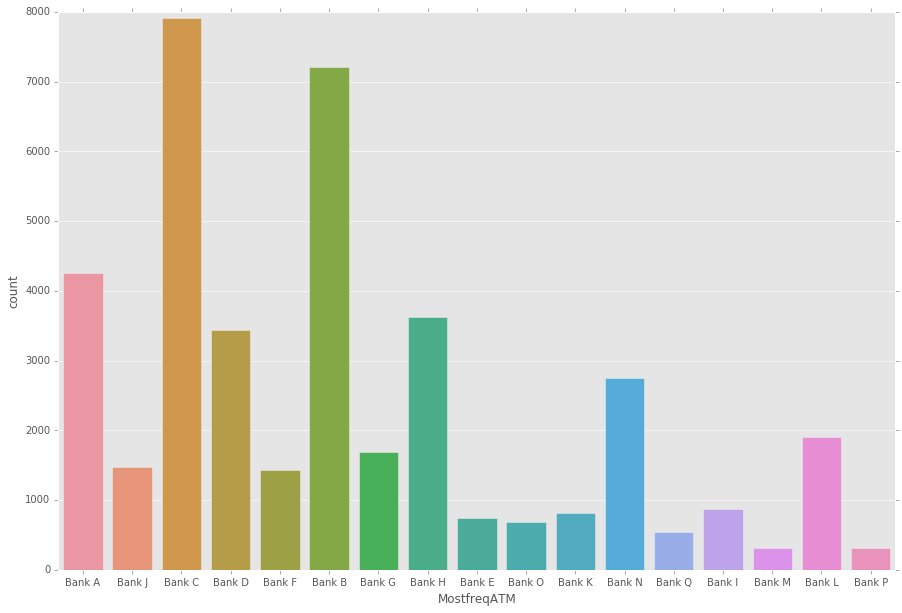

In [18]:
plt.rcParams['figure.figsize']=(15,10)
sns.countplot(x='MostfreqATM', data=data)

In [19]:
def reason_freq_atm_encode(col):
    if col['ATMproximity'] == 'Yes':
        return 'proximity'
    elif col['ATMqon'] == 'Yes':
        return 'noteQuality'
    elif col['ATMsecurity'] == 'Yes':
        return 'secureEnvironment'
    elif col['ATMros'] =='Yes':
        return 'reliability'

data['reason_freq_atm'] = data.apply(reason_freq_atm_encode, axis=1)

reason_atm_cols = ['ATMproximity', 'ATMqon', 'ATMsecurity', 'ATMros']

data.drop(reason_atm_cols, axis=1, inplace=True)

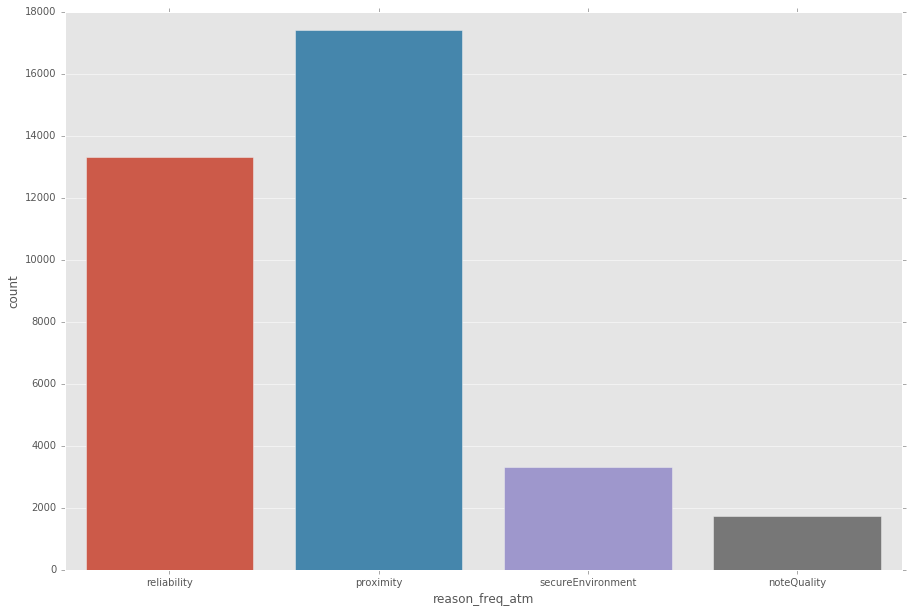

In [20]:
sns.countplot(x='reason_freq_atm', data=data)

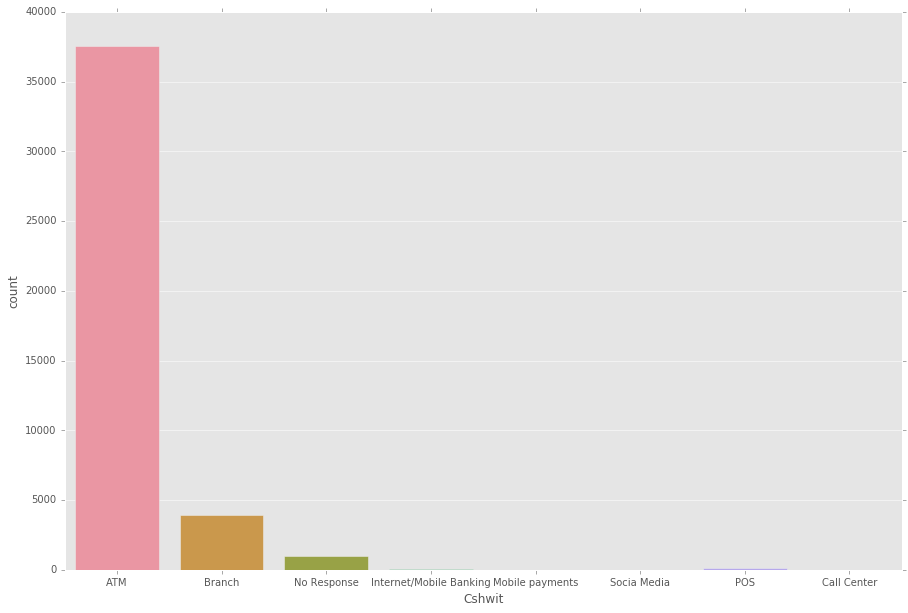

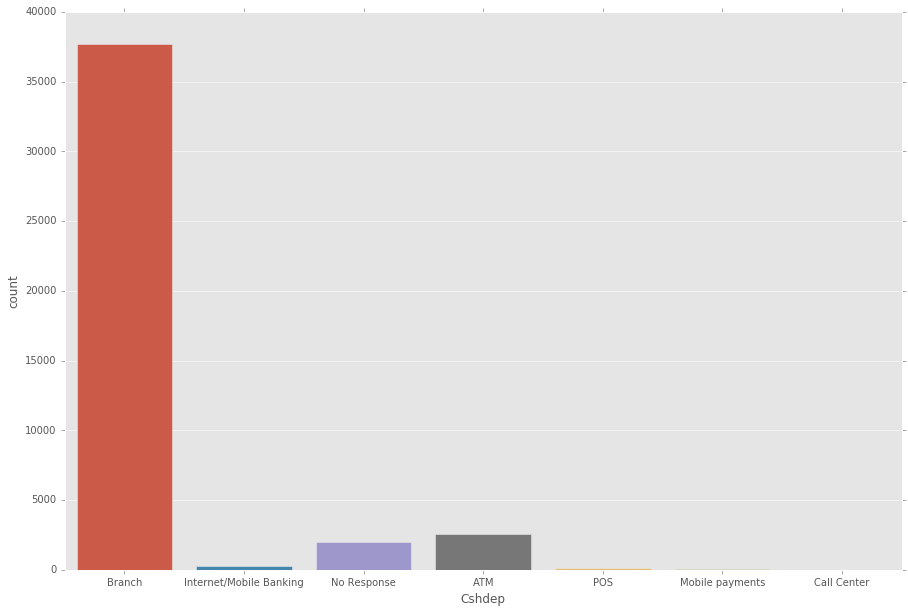

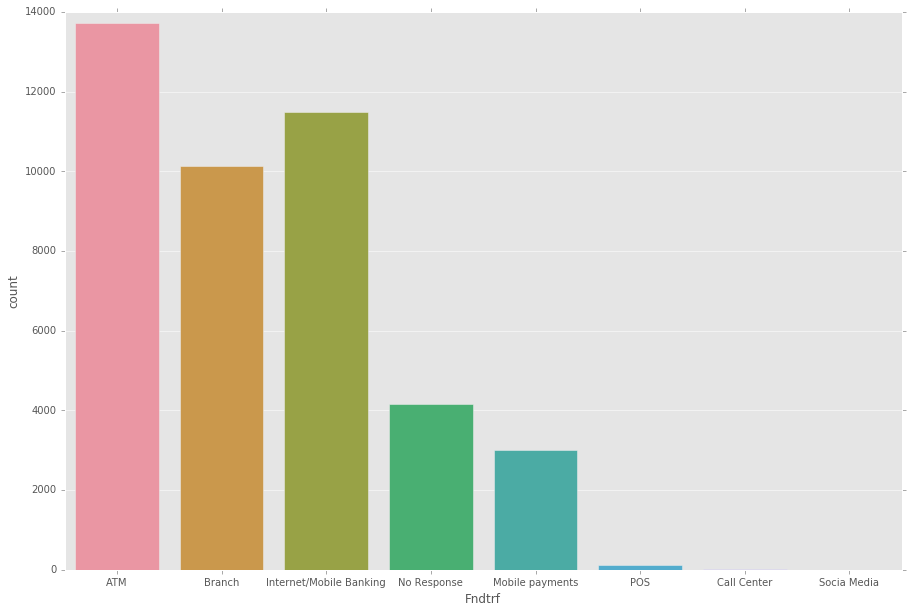

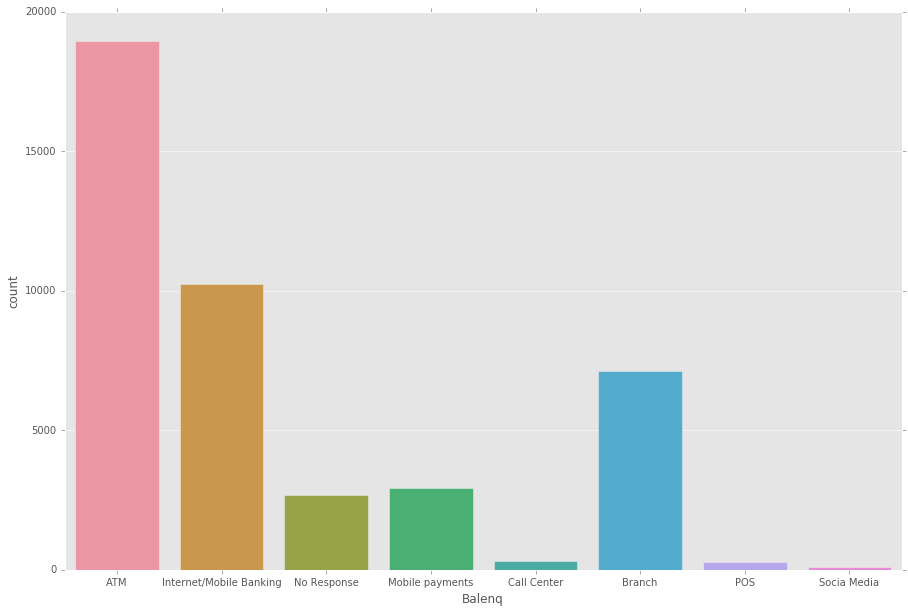

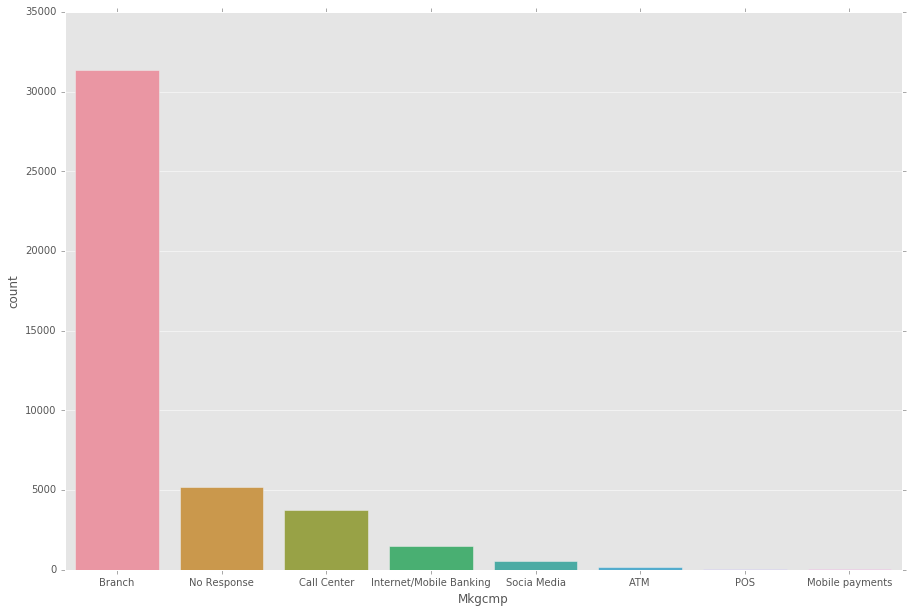

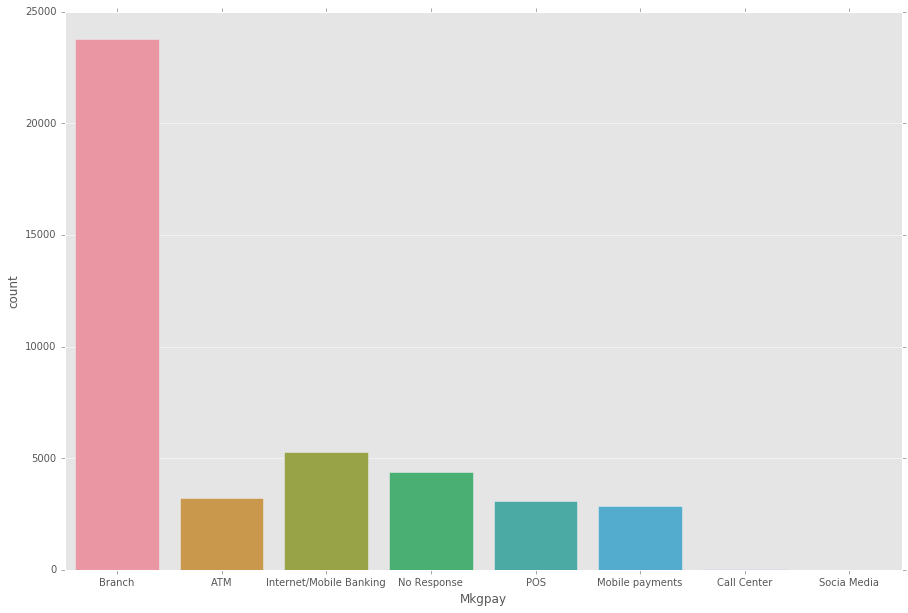

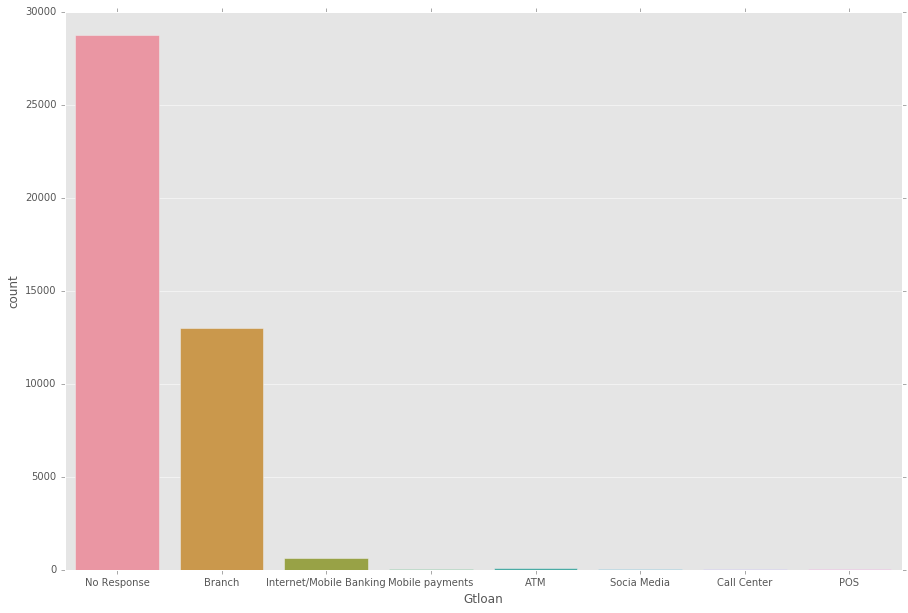

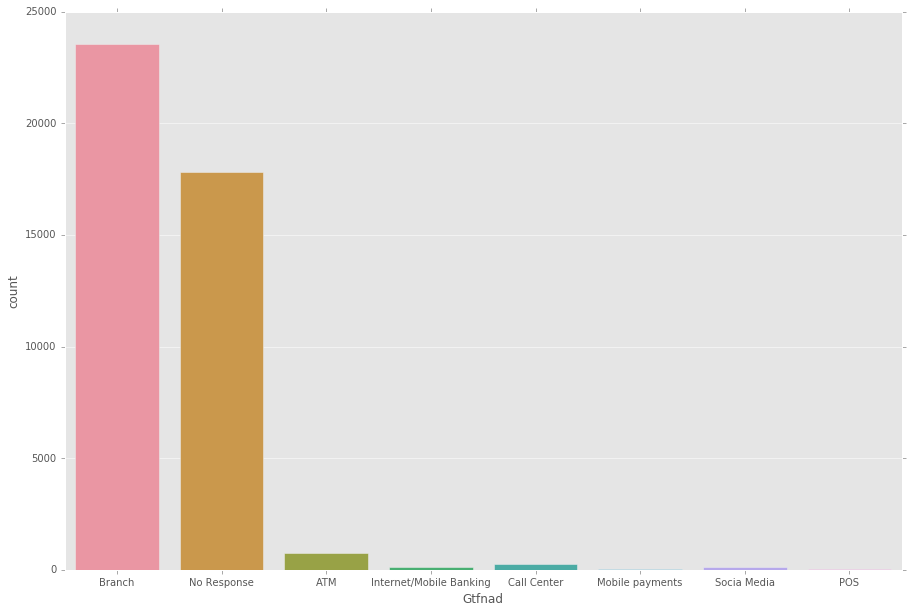

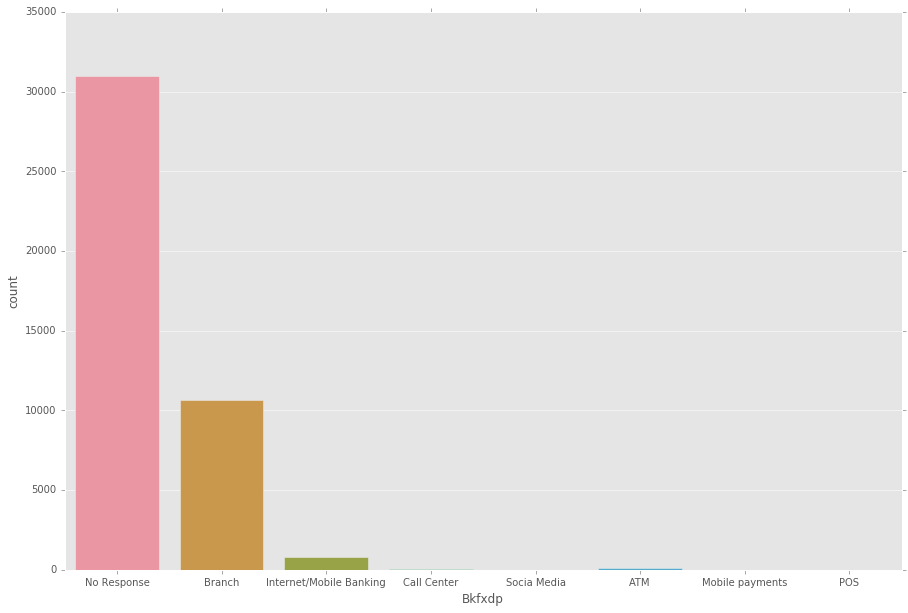

In [21]:
banking_activities=['Cshwit','Cshdep','Fndtrf','Balenq','Mkgcmp','Mkgpay','Gtloan','Gtfnad','Bkfxdp']
for i in banking_activities:
    fig = plt.figure()
    ax  = sns.countplot(x = i, data=data)

In [22]:
def turnToNo(col):
    if col == 'Yes':
        return 'Yes'
    else:
        return 'No'
    
cols_no = ['Payuticash','Payintcash','Paycabcash','Payuti','Payint','Paycab','Mig1','Mig2','Mig3']

for i in cols_no:
    data[i+'_encode'] = data[i].apply(turnToNo)
    data.drop(i, axis=1, inplace=True)


In [23]:
data['Rec'].value_counts()

Absolutely will        21072
Often will              9793
Sometimes will          7728
Absolutely will not     2236
0                       1192
No Response              631
Name: Rec, dtype: int64

In [24]:
data['rec_encode'] = data['Rec']
recoded_ = {'rec_encode':{'No Response':0, 'Absolutely will not':1, 'Sometimes will':2, 
                                    'Often will':3, 'Absolutely will':4,
                                   'At Least once a day':5, '0':0}}
data.replace(recoded_, inplace=True)

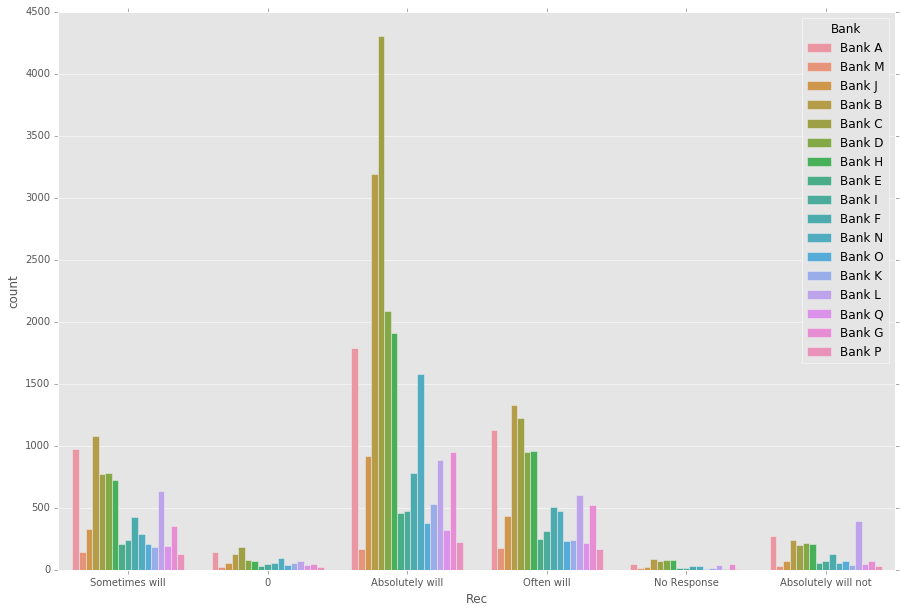

In [25]:
data.drop('rec_encode', axis=1, inplace=True)
sns.countplot(x = 'Rec', data=data, hue='Bank')

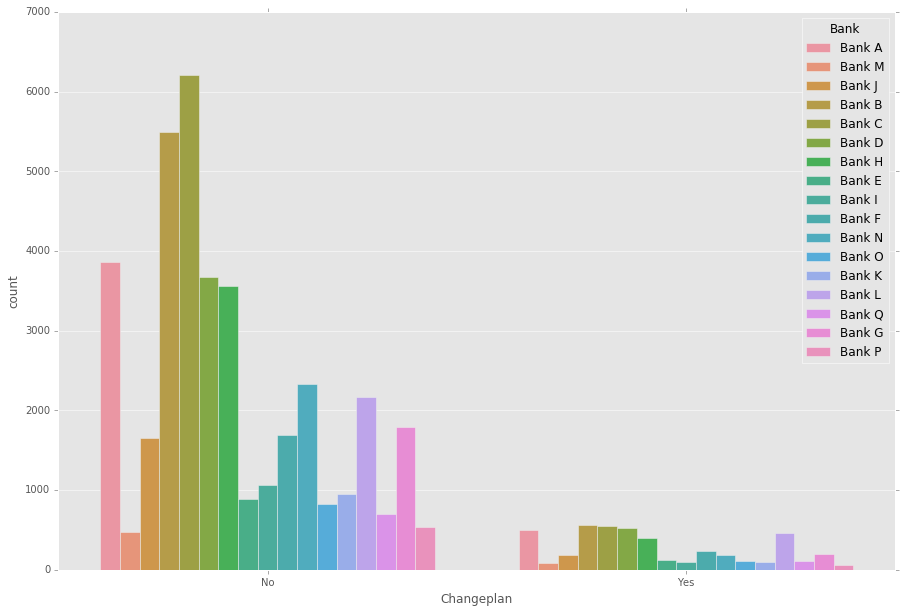

In [26]:
sns.countplot(x='Changeplan', data=data, hue='Bank')

In [27]:
re_col = ['impcc1a',
'cc1a',
'impcc1b',
'cc1b',
'impcc2',
'cc2',
'impcc3',
'cc3',
'impcc4',
'cc4',
'impcc4b',
'cc4b',
'qosbrn1i',
'qosbrn1',
'qosbrn2i',
'qosbrn2',
'qosbrn3i',
'qosbrn3',
'tat1i',
'tat1',
'tat2i',
'tat2',
'tat3i',
'tat3',
'qosatm1',
'qosatm1i',
'qosatm2i',
'qosatm2',
'qosatm3i',
'qosatm3',
'qosatm4i',
'qosatm4',
'qosmob1i',
'qosmob1',
'qosmob2i',
'qosmob2',
'qosmob3i',
'qosmob3',
'qosmob4i',
'qosmob4',
'qosmob5i',
'qosmob5',
'qosmob6i',
'qosmob6',
'qosint1i',
'qosint1',
'qosint2i',
'qosint2',
'qosint3i',
'qosint3',
'qosint4i',
'qosint4',
'qosint5i',
'qosint5',
'qosint6i',
'qosint6',
'qoscct1i',
'qoscct1',
'qoscct2i',
'qoscct2',
'qoscct3i',
'qoscct3',
'qossm1i',
'qossm1',
'qossm2i',
'qossm2',
'qoscad1i',
'qoscad1',
'qoscad2i',
'qoscad2',
'qoscad3i',
'qoscad3',
'qoscad4i',
'qoscad4',
'acci',
'acc',
'infi',
'inf',
'prd1i',
'prd1',
'prd2i',
'prd2',
'eas1i',
'eas1',
'eas2i',
'eas2',
'qosci',
'qosc']



In [28]:
data_new = data.drop(re_col, axis=1)

In [29]:
data_new.drop('Quest No', axis=1, inplace=True)

In [30]:
# data_new.head()
rm_colss = ['Changeplan', 'FromBank', 'ToBank', 'ChangeReasons']
data_new.drop(rm_colss, axis=1, inplace=True)

In [31]:
data_new.head()

,Gender,Employment Category,Education,Income,Bank,No of Years,Most frequently used Bank,MostfreqATM,Cshwit,Cshdep,Fndtrf,Balenq,Mkgcmp,Mkgpay,Gtloan,Gtfnad,Bkfxdp,Cshwit2,Cshdep2,Fndtrf2,Balenq2,mkgcmp2,Mkgpay2,Gtloan2,Gtfnad2,Bkfxdp2,Rec,banking_rtnship,location_re,Age_regroup,device_used,FreqBra_encode,FreqATM_encode,FreqPOS_encode,FreqInt_encode,FreqMob_encode,FreqUSSD_encode,FreqTel_encode,reason_freq_atm,Payuticash_encode,Payintcash_encode,Paycabcash_encode,Payuti_encode,Payint_encode,Paycab_encode,Mig1_encode,Mig2_encode,Mig3_encode
0,No Response,Civil/Public Servant,OND/HND,"N50,000 - N100,000",Bank A,12,Bank A,Bank A,ATM,Branch,ATM,ATM,Branch,Branch,No Response,Branch,No Response,ATM,Branch,ATM,ATM,Branch,POS,Branch,Branch,Branch,Sometimes will,RatQOS,North,31-40,None,2,3,1,1,1,1,1,reliability,No,No,No,No,No,No,No,No,No
1,No Response,Civil/Public Servant,OND/HND,"N50,000 - N100,000",Bank M,6,Bank A,Bank A,ATM,Branch,ATM,ATM,Branch,Branch,No Response,Branch,No Response,ATM,Branch,ATM,ATM,Branch,POS,Branch,Branch,Branch,0,RatPOBR,North,31-40,None,2,3,1,1,1,1,1,reliability,No,No,No,No,No,No,No,No,No
2,No Response,Self Employed,Bachelor's Decree,"Below N50,000",Bank J,2,Bank B,Bank J,ATM,Branch,ATM,ATM,No Response,ATM,No Response,Branch,No Response,Branch,Branch,Internet/Mobile Banking,Internet/Mobile Banking,Branch,Internet/Mobile Banking,Branch,Branch,Branch,Absolutely will,None,North,31-40,None,3,3,1,1,1,5,1,None,Yes,No,No,No,No,No,Yes,No,No
3,No Response,Self Employed,Bachelor's Decree,"Below N50,000",Bank B,NaN,Bank B,Bank J,ATM,Branch,ATM,ATM,No Response,ATM,No Response,Branch,No Response,Branch,Branch,Internet/Mobile Banking,Internet/Mobile Banking,Branch,Internet/Mobile Banking,Branch,Branch,Branch,Often will,None,North,31-40,None,3,3,1,1,1,5,1,None,Yes,No,No,No,No,No,Yes,No,No
4,Male,Private Sector Employee,Bachelor's Decree,"Below N50,000",Bank C,5,Bank C,Bank C,ATM,Branch,Branch,ATM,Branch,Branch,Branch,Branch,Branch,ATM,Branch,ATM,ATM,Internet/Mobile Banking,No Response,Branch,Internet/Mobile Banking,Internet/Mobile Banking,Often will,RatQOS,North,18-30,smartphone,3,4,2,2,2,2,1,proximity,Yes,No,No,No,Yes,No,Yes,No,No


In [42]:
#!/usr/bin/env python


from kmodes.kmodes import KModes

km = KModes(n_clusters=5, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(data_new)

# Print the cluster centroids

print km.n_clusters
print km.labels_

/usr/local/lib/python2.7/dist-packages/numpy/lib/arraysetops.py:216: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 17499, cost: 899336.0
Run 1, iteration: 2/100, moves: 2591, cost: 899336.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 16259, cost: 900225.0
Run 2, iteration: 2/100, moves: 3458, cost: 898982.0
Run 2, iteration: 3/100, moves: 1775, cost: 897635.0
Run 2, iteration: 4/100, moves: 1832, cost: 897635.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 15518, cost: 905116.0
Run 3, iteration: 2/100, moves: 1391, cost: 905116.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 17289, cost: 906212.0
Run 4, iteration: 2/100, moves: 8798, cost: 897800.0
Run 4, iteration: 3/100, moves: 5322, cost: 896344.0
Run 4, iteration: 4/100, moves: 1977, cost: 896344.0
Init: initializing centroids
Init: initi

In [43]:
data_new['category_cluster'] = km.labels_

In [49]:
data_new.head()

,Gender,Employment Category,Education,Income,Bank,No of Years,Most frequently used Bank,MostfreqATM,Cshwit,Cshdep,Fndtrf,Balenq,Mkgcmp,Mkgpay,Gtloan,Gtfnad,Bkfxdp,Cshwit2,Cshdep2,Fndtrf2,Balenq2,mkgcmp2,Mkgpay2,Gtloan2,Gtfnad2,Bkfxdp2,Rec,banking_rtnship,location_re,Age_regroup,device_used,FreqBra_encode,FreqATM_encode,FreqPOS_encode,FreqInt_encode,FreqMob_encode,FreqUSSD_encode,FreqTel_encode,reason_freq_atm,Payuticash_encode,Payintcash_encode,Paycabcash_encode,Payuti_encode,Payint_encode,Paycab_encode,Mig1_encode,Mig2_encode,Mig3_encode,category_cluster
0,No Response,Civil/Public Servant,OND/HND,"N50,000 - N100,000",Bank A,12,Bank A,Bank A,ATM,Branch,ATM,ATM,Branch,Branch,No Response,Branch,No Response,ATM,Branch,ATM,ATM,Branch,POS,Branch,Branch,Branch,Sometimes will,RatQOS,North,31-40,None,2,3,1,1,1,1,1,reliability,No,No,No,No,No,No,No,No,No,0
1,No Response,Civil/Public Servant,OND/HND,"N50,000 - N100,000",Bank M,6,Bank A,Bank A,ATM,Branch,ATM,ATM,Branch,Branch,No Response,Branch,No Response,ATM,Branch,ATM,ATM,Branch,POS,Branch,Branch,Branch,0,RatPOBR,North,31-40,None,2,3,1,1,1,1,1,reliability,No,No,No,No,No,No,No,No,No,0
2,No Response,Self Employed,Bachelor's Decree,"Below N50,000",Bank J,2,Bank B,Bank J,ATM,Branch,ATM,ATM,No Response,ATM,No Response,Branch,No Response,Branch,Branch,Internet/Mobile Banking,Internet/Mobile Banking,Branch,Internet/Mobile Banking,Branch,Branch,Branch,Absolutely will,None,North,31-40,None,3,3,1,1,1,5,1,None,Yes,No,No,No,No,No,Yes,No,No,2
3,No Response,Self Employed,Bachelor's Decree,"Below N50,000",Bank B,NaN,Bank B,Bank J,ATM,Branch,ATM,ATM,No Response,ATM,No Response,Branch,No Response,Branch,Branch,Internet/Mobile Banking,Internet/Mobile Banking,Branch,Internet/Mobile Banking,Branch,Branch,Branch,Often will,None,North,31-40,None,3,3,1,1,1,5,1,None,Yes,No,No,No,No,No,Yes,No,No,2
4,Male,Private Sector Employee,Bachelor's Decree,"Below N50,000",Bank C,5,Bank C,Bank C,ATM,Branch,Branch,ATM,Branch,Branch,Branch,Branch,Branch,ATM,Branch,ATM,ATM,Internet/Mobile Banking,No Response,Branch,Internet/Mobile Banking,Internet/Mobile Banking,Often will,RatQOS,North,18-30,smartphone,3,4,2,2,2,2,1,proximity,Yes,No,No,No,Yes,No,Yes,No,No,4


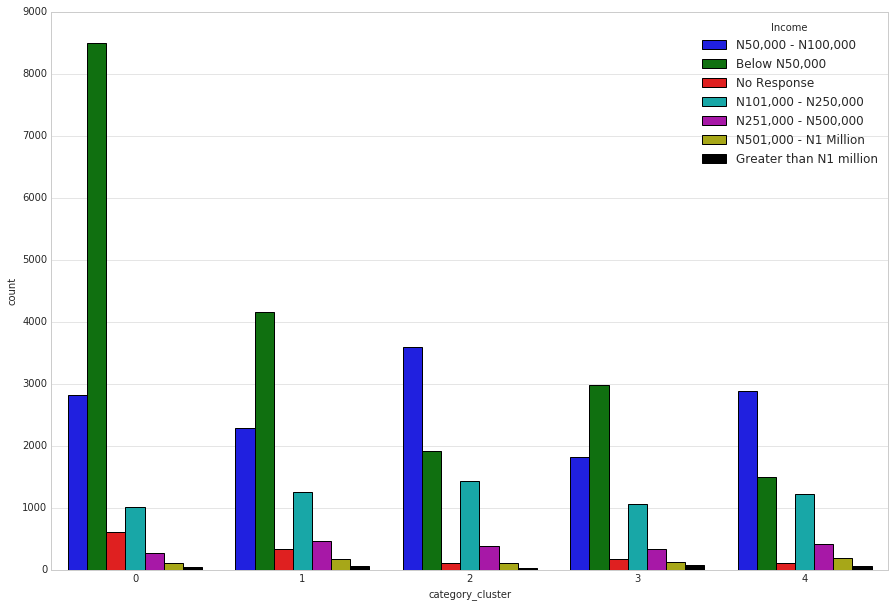

In [51]:
# data_new['category_cluster'].value_counts()
sns.countplot(x='category_cluster', data=data_new, hue='Income')

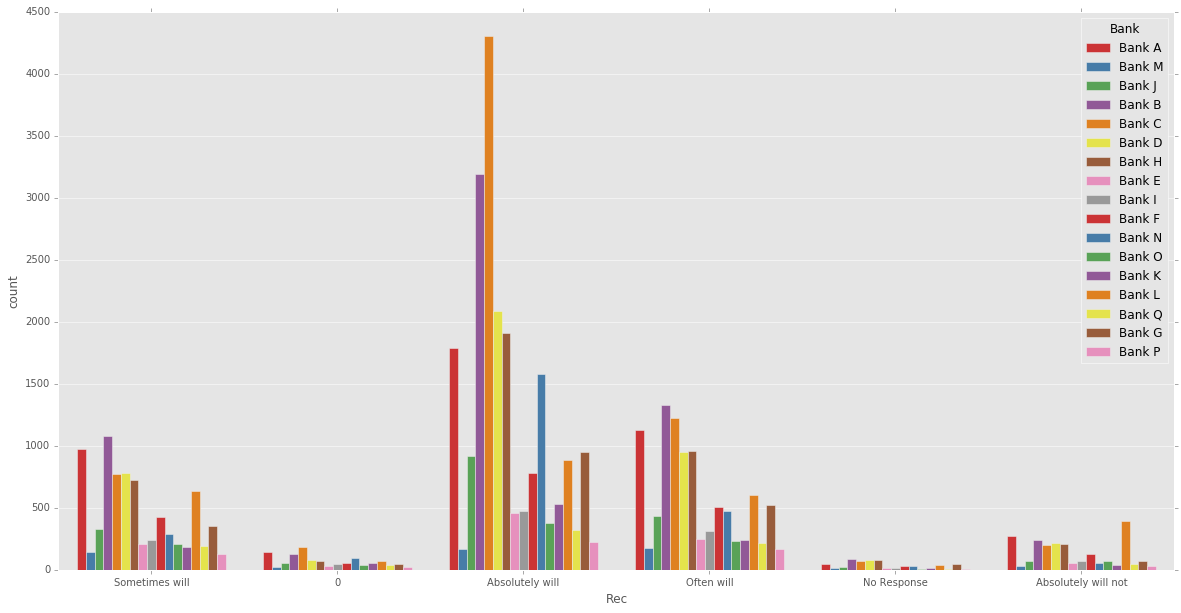

In [32]:
# data['Rec']
plt.rcParams['figure.figsize']=(20,10)
sns.countplot(x= data['Rec'], data=data, hue='Bank', palette="Set1")

In [33]:

# filter = (data['Bank'] == 'Bank A') & (data['Rec'] == 'Absolutely will')
# data[filter].shape


def co(x):
    if x == '0':
        return 'No Response'
    else:
        return x

data['Rec'] = data['Rec'].apply(co)

In [34]:
# data_new.to_csv('kpmg_cat.csv')

In [35]:
from __future__ import division


def percen(v, status):
    if status == 'will':
        return (v[0] + v[3] + v[4]) / v.sum()
    elif status=='willnot':
        return (v[1] / v.sum())

In [36]:

referal_list = []
non_referal_list = []
for i in pd.crosstab(index=data['Bank'], columns=data['Rec']).index:
    v = pd.crosstab(index=data['Bank'], columns=data['Rec']).loc[i, :]
    print i, percen(v, 'will')
    print i, percen(v, 'willnot')
    referal_list.append(percen(v, 'will'))
    non_referal_list.append(percen(v, 'willnot'))

Bank A 0.891972477064
Bank A 0.0633027522936
Bank B 0.924129968662
Bank B 0.0399142338776
Bank C 0.9332247557
Bank C 0.0290198400948
Bank D 0.909588389246
Bank D 0.0521056388294
Bank E 0.904055390702
Bank E 0.051434223541
Bank F 0.890681936491
Bank F 0.0671525247267
Bank G 0.917293233083
Bank G 0.0365914786967
Bank H 0.907805001263
Bank H 0.0522859307906
Bank I 0.885146804836
Bank I 0.0647668393782
Bank J 0.917256396298
Bank J 0.0375612411541
Bank K 0.904716981132
Bank K 0.0358490566038
Bank L 0.808276385725
Bank L 0.149962034928
Bank M 0.870106761566
Bank M 0.0604982206406
Bank N 0.927438540841
Bank N 0.0229976209358
Bank O 0.875
Bank O 0.073093220339
Bank P 0.894915254237
Bank P 0.0576271186441
Bank Q 0.890797546012
Bank Q 0.0539877300613


In [37]:
index_rec = pd.crosstab(index=data['Bank'], columns=data['Rec']).index
refer_table = pd.DataFrame(index=index_rec, data={'recommend': referal_list, 'not_recommend': non_referal_list})

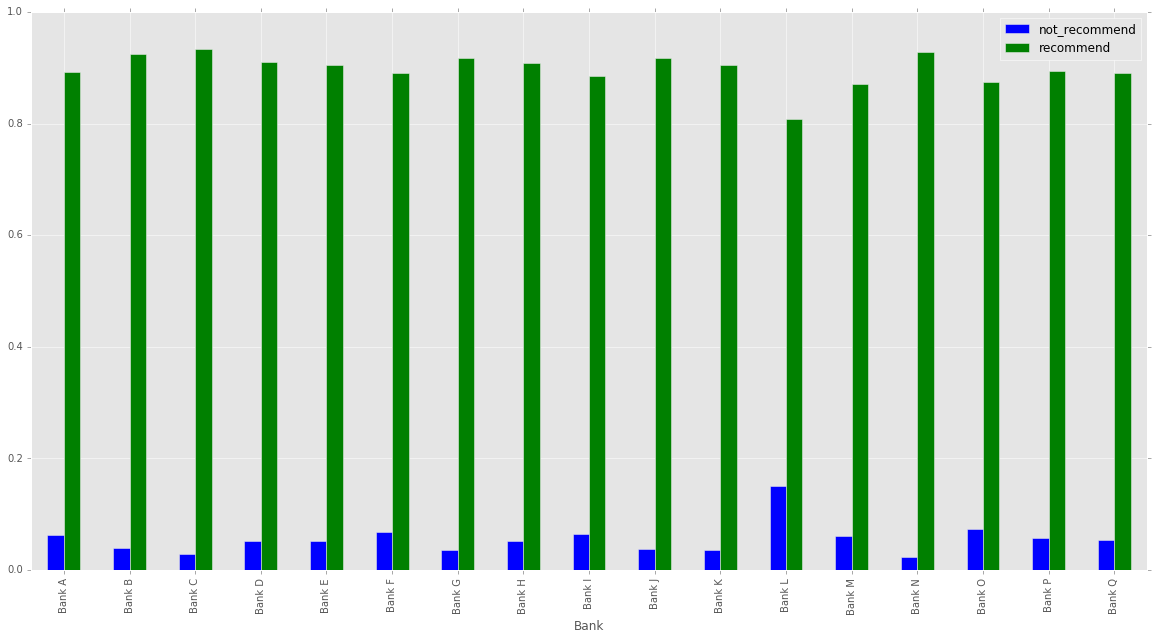

In [38]:
refer_table.plot(kind='bar', figsize=(20,10))

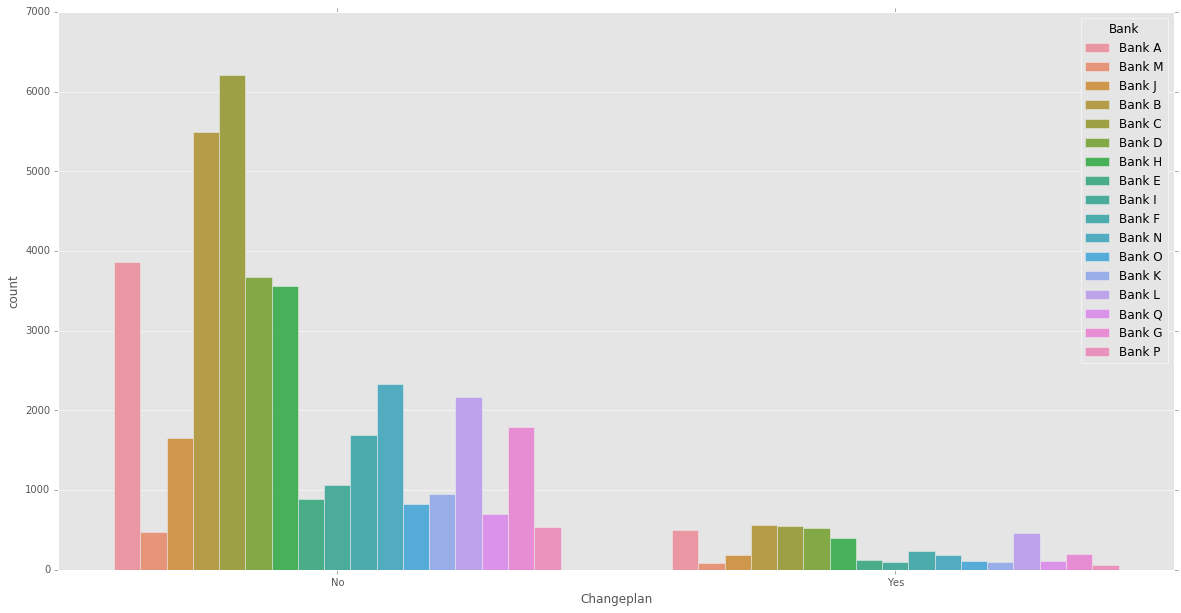

In [39]:
sns.countplot(x='Changeplan', data=data, hue='Bank')

In [49]:
index_cgn = pd.crosstab(index=data['Bank'], columns=data['Changeplan']).index


def percen_2(v, status):
    if status == 'Yes':
        return v[1] / v.sum()
    elif status == 'No':
        return v[0] / v.sum()
y_cgn_plan = []
n_cgn_plan = []
for i in pd.crosstab(index=data['Bank'], columns=data['Changeplan']).index:
    col = pd.crosstab(index=data['Bank'], columns=data['Changeplan']).loc[i, :]
    y_cgn_plan.append(percen_2(col, 'Yes'))
    n_cgn_plan.append(percen_2(col, 'No'))
    
df_changePlan = pd.DataFrame(index=index_cgn, data= {'No': n_cgn_plan, 'Yes': y_cgn_plan})

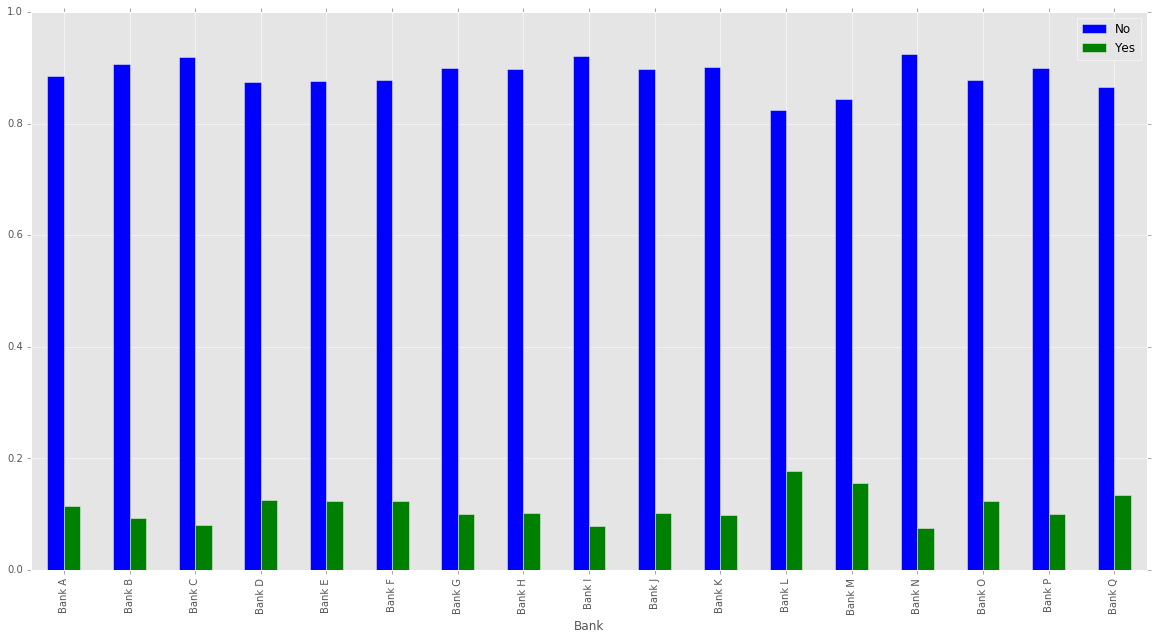

In [51]:

df_changePlan.plot(kind='bar', figsize=(20,10))

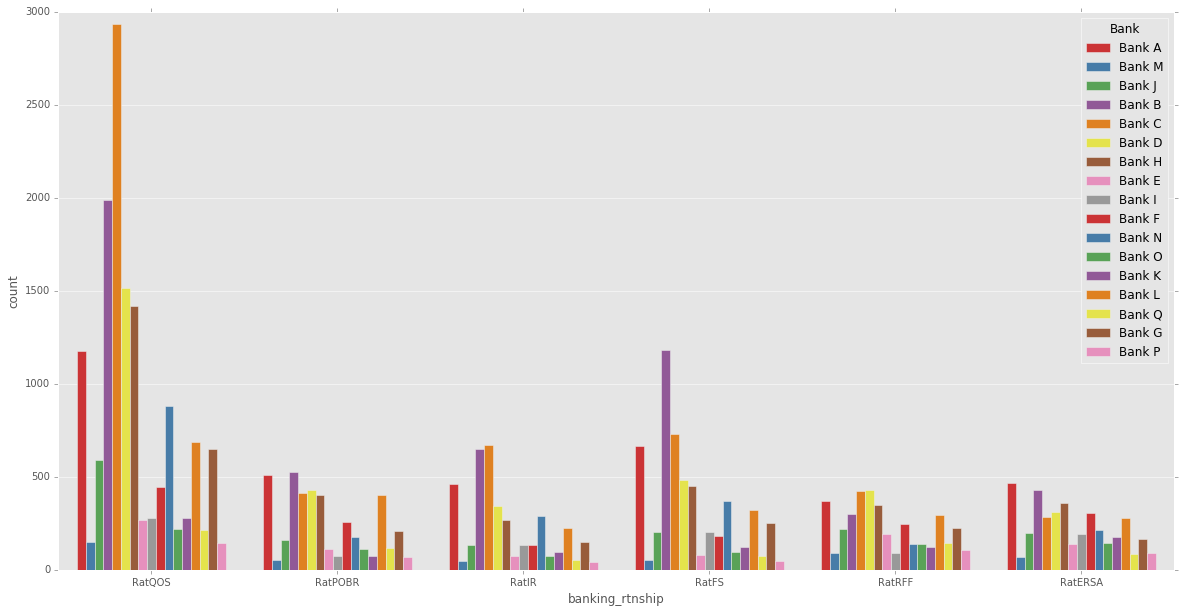

In [58]:
sns.countplot(x='banking_rtnship', data=data, hue='Bank', palette="Set1")
# plt.legend()

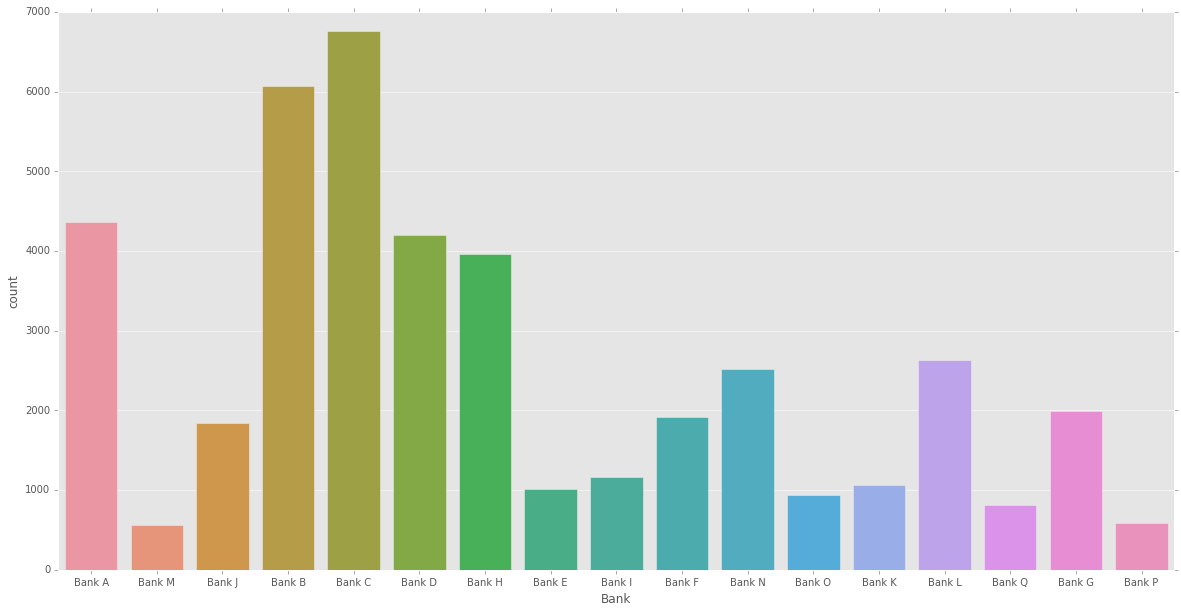

In [63]:
pd.crosstab(index=data['banking_rtnship'], columns=data['Bank'])

sns.countplot(x='Bank', data=data)

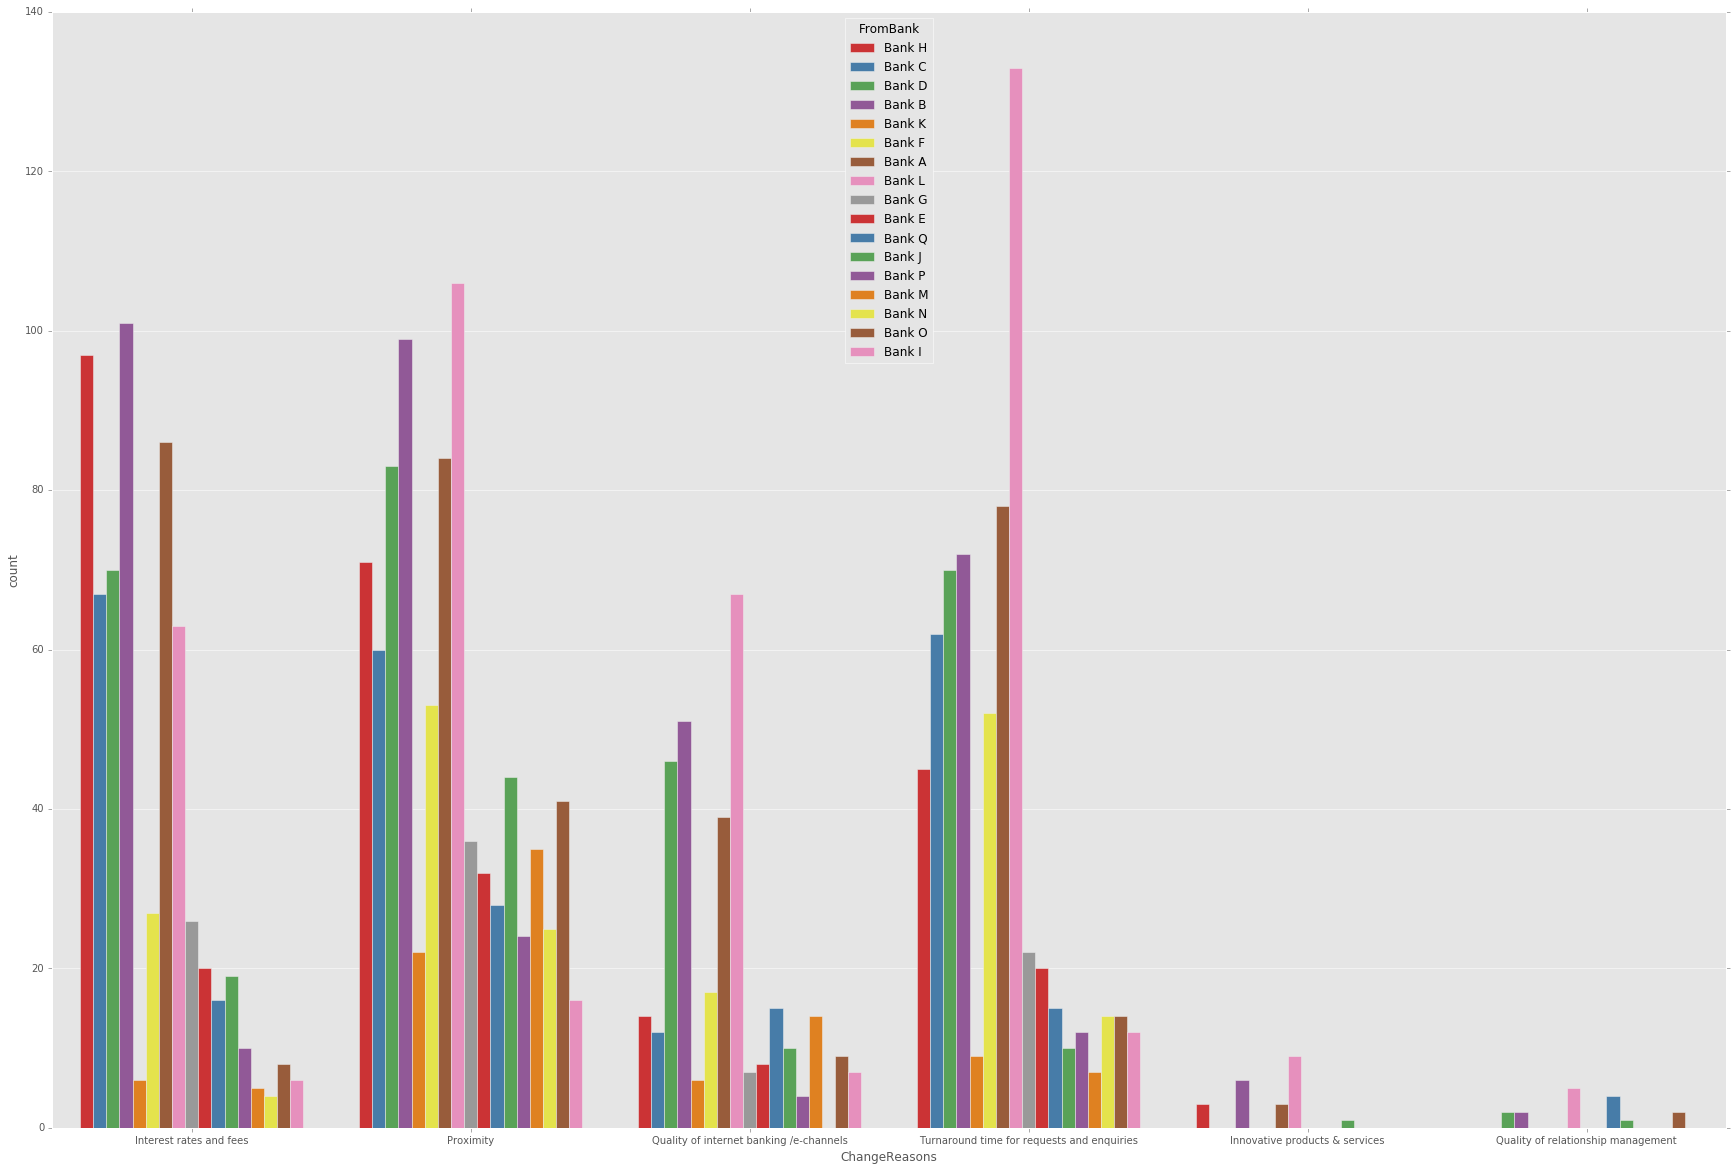

In [78]:

filter_ = (data['ChangeReasons'] == 'Others')
data_filtered = data[-filter_]

plt.rcParams['figure.figsize']=(30,20)
sns.countplot(x='ChangeReasons', data=data_filtered, hue='FromBank',palette="Set1")


In [4]:
df = pd.read_excel('data/kpmg_data.xlsx', sheetname=1)
# df_cluster = pd.read_csv('df_data.csv')

,Quest No,Age,Gender,Employment Category,Education,Income,Location,Bank,No of Years,Most frequently used Bank,...,Paycab,Mig1,Mig2,Mig3,Rec,Changeplan,FromBank,ToBank,ChangeReasons,category_cluster
0,ABJ/2015/002/196,31-35,No Response,Civil/Public Servant,OND/HND,"N50,000 - N100,000",Abuja,Bank A,12.0,Bank A,...,NaN,NaN,NaN,NaN,Sometimes will,No,NaN,NaN,NaN,0
1,ABJ/2015/002/196,31-35,No Response,Civil/Public Servant,OND/HND,"N50,000 - N100,000",Abuja,Bank M,6.0,Bank A,...,NaN,NaN,NaN,NaN,0,No,NaN,NaN,NaN,0
2,KAN/2015/001/228,31-35,No Response,Self Employed,Bachelor's Decree,"Below N50,000",Kano,Bank J,2.0,Bank B,...,NaN,Yes,NaN,NaN,Absolutely will,No,NaN,NaN,NaN,1
3,KAN/2015/001/228,31-35,No Response,Self Employed,Bachelor's Decree,"Below N50,000",Kano,Bank B,NaN,Bank B,...,NaN,Yes,NaN,NaN,Often will,No,NaN,NaN,NaN,1
4,KAN/2015/04/061,21-30,Male,Private Sector Employee,Bachelor's Decree,"Below N50,000",Kano,Bank C,5.0,Bank C,...,NaN,Yes,NaN,NaN,Often will,No,NaN,NaN,NaN,2


In [37]:
df.drop('Quest No', axis=1, inplace=True)

In [38]:
# sns.countplot(x='Age', data=df)
cols = ['Income', 'Education', 'Age', 'Employment Category', 
        'FreqBra','FreqATM','FreqPOS','FreqInt','FreqMob',
        'FreqUSSD','FreqTel',
        'Cshwit','Cshdep','Fndtrf','Balenq','Mkgcmp','Mkgpay',
        'Gtloan','Gtfnad','Bkfxdp','Payuticash','Payintcash',
        'Paycabcash','Payuti','Payint','Paycab']

df = df[cols]

In [39]:
d_replace = df[['Payuticash','Payintcash','Paycabcash','Payuti','Payint','Paycab']].fillna('No')

In [40]:
df.drop(['Payuticash','Payintcash','Paycabcash','Payuti','Payint','Paycab'],axis=1, inplace=True)

In [41]:
df = pd.concat([df, d_replace],axis=1)

In [42]:
df['FreqBra'].unique()

array([u'Rarely', u'Monthly', u'No Response', u'At least once a week',
       u'At Least once a day', u'Never', nan], dtype=object)

In [43]:

chan_freq = ['FreqBra','FreqATM','FreqPOS','FreqInt','FreqMob','FreqUSSD','FreqTel']

def frequency_encode(col):
    if col == 'Rarely':
        return 'Rarely&Never'
    elif col == 'Monthly':
        return 'Monthly'
    elif col == 'At least once a week':
        return 'weekly&daily'
    elif col == 'At Least once a day':
        return 'weekly&daily'
    elif col == 'Never':
        return 'Rarely&Never'

for i in chan_freq:
    df[i] = df[i].apply(frequency_encode)

In [50]:
# sns.countplot(x='FreqBra', data=df)

from kmodes.kmodes import KModes

km = KModes(n_clusters=5, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(df)

# Print the cluster centroids

print km.n_clusters
print km.labels_

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 21211, cost: 350997.0
Run 1, iteration: 2/100, moves: 1153, cost: 350997.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 12099, cost: 358438.0
Run 2, iteration: 2/100, moves: 1167, cost: 358438.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 20836, cost: 357698.0
Run 3, iteration: 2/100, moves: 7758, cost: 350951.0
Run 3, iteration: 3/100, moves: 3314, cost: 350951.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 15063, cost: 351009.0
Run 4, iteration: 2/100, moves: 2272, cost: 351009.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 12283, cost: 355695.0
Run 5, iteration: 2/100, moves: 3724, cost: 353310.0
Run 5, itera

In [51]:
df['category_cluster'] = km.labels_

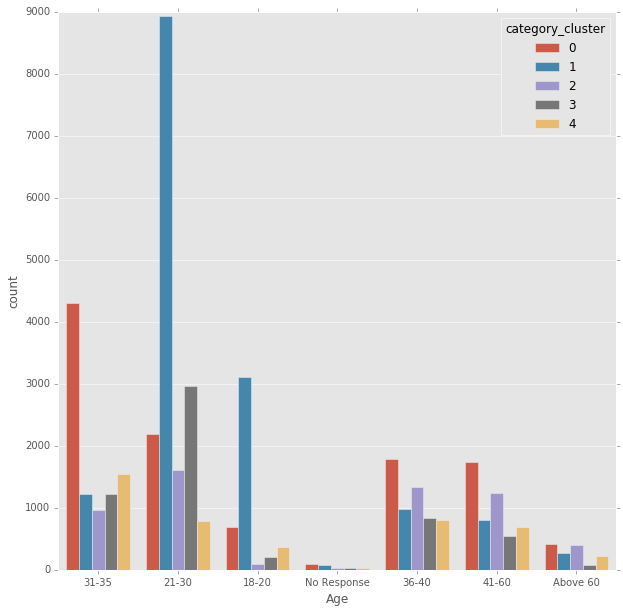

In [88]:
# df.to_csv('df_data.csv')
plt.rcParams['figure.figsize']=(10,10)
sns.countplot(x='Age', data=df, hue='category_cluster')

In [66]:
pd.crosstab(index=df['category_cluster'], columns=df['Age'])

Age,18-20,21-30,31-35,36-40,41-60,Above 60,No Response
category_cluster,,,,,,,
0,691,2194,4308,1784,1731,422,94
1,3112,8937,1223,976,797,277,79
2,92,1605,972,1337,1237,401,28
3,214,2972,1223,841,550,70,36
4,362,795,1551,796,695,228,22


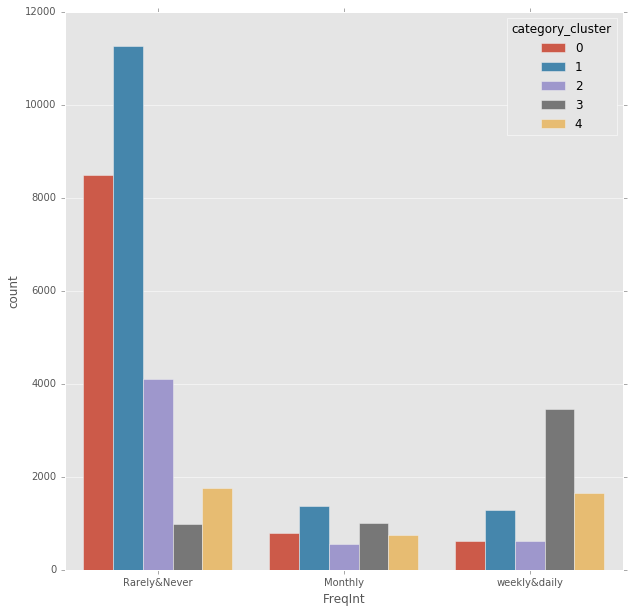

In [89]:
# pd.crosstab(index=df['category_cluster'], columns=df['FreqInt'])
plt.rcParams['figure.figsize']=(10,10)
sns.countplot(x='FreqInt', data=df, hue='category_cluster')

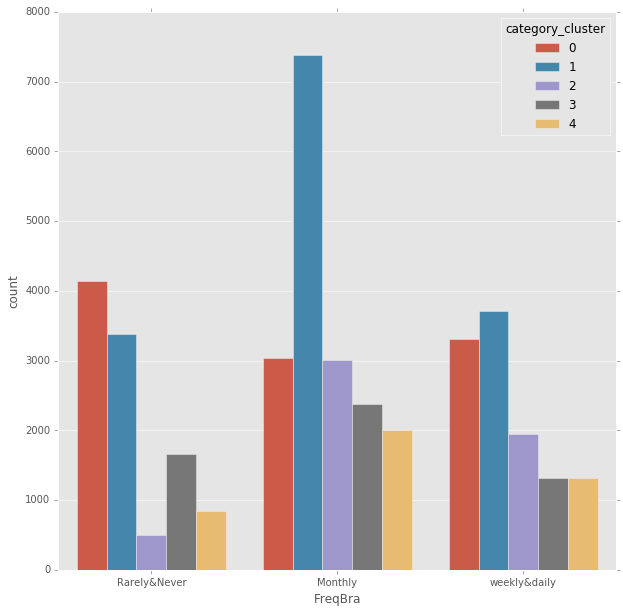

In [90]:
sns.countplot(x='FreqBra', data=df, hue='category_cluster')

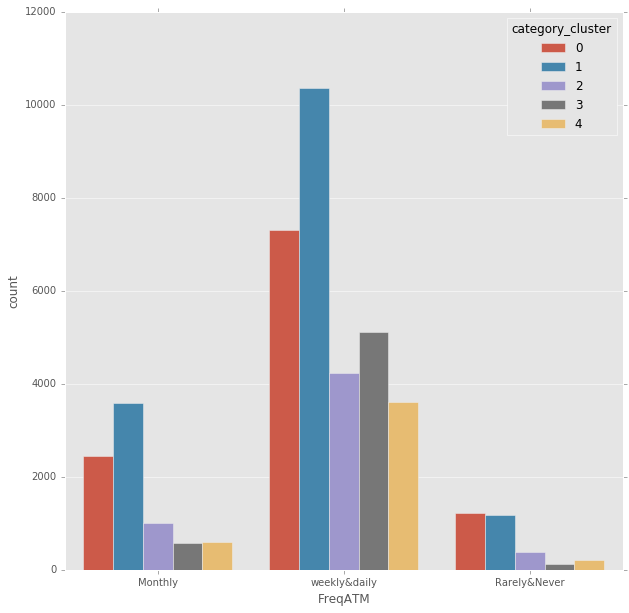

In [91]:
sns.countplot(x='FreqATM', data=df, hue='category_cluster')

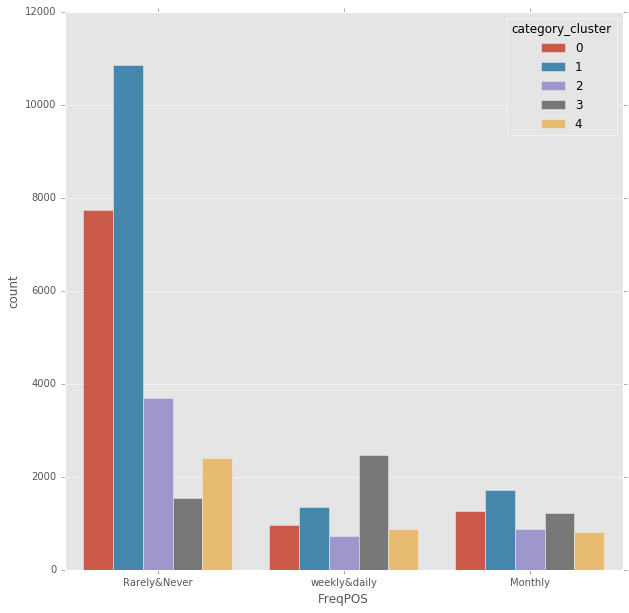

In [92]:
sns.countplot(x='FreqPOS', data=df, hue='category_cluster')

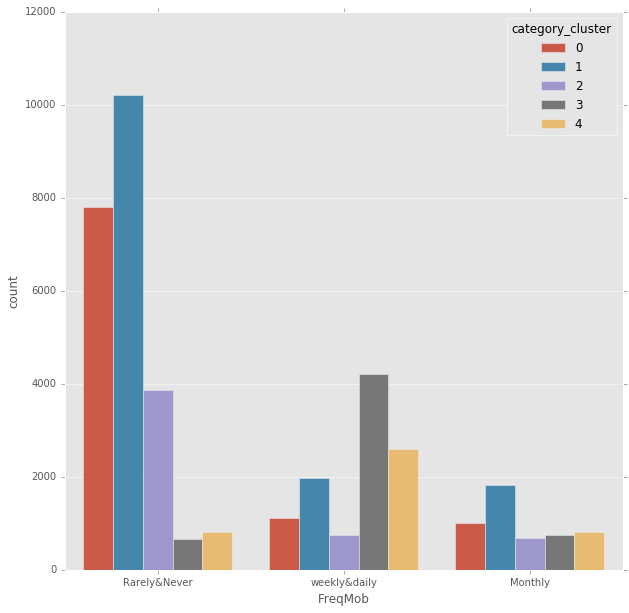

In [93]:
sns.countplot(x='FreqMob', data=df, hue='category_cluster')

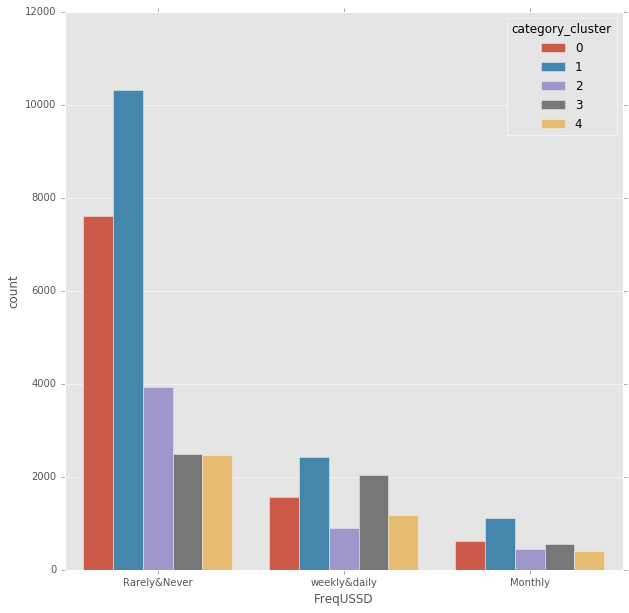

In [94]:
sns.countplot(x='FreqUSSD', data=df, hue='category_cluster')

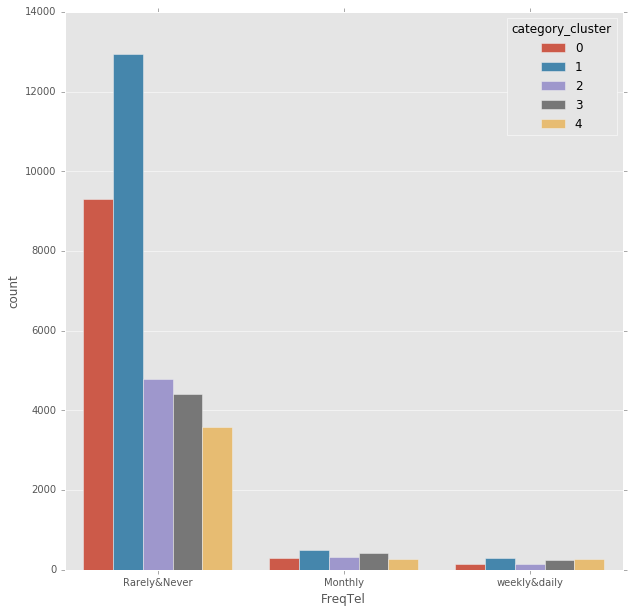

In [95]:
sns.countplot(x='FreqTel', data=df, hue='category_cluster')

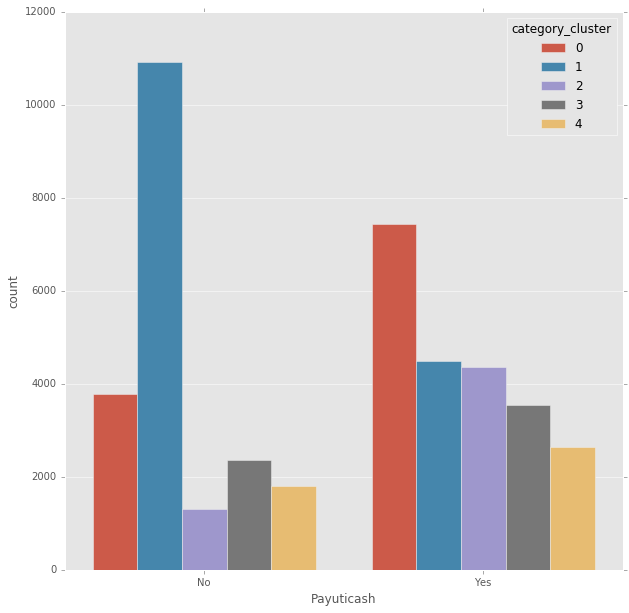

In [96]:
sns.countplot(x='Payuticash', data=df, hue='category_cluster')

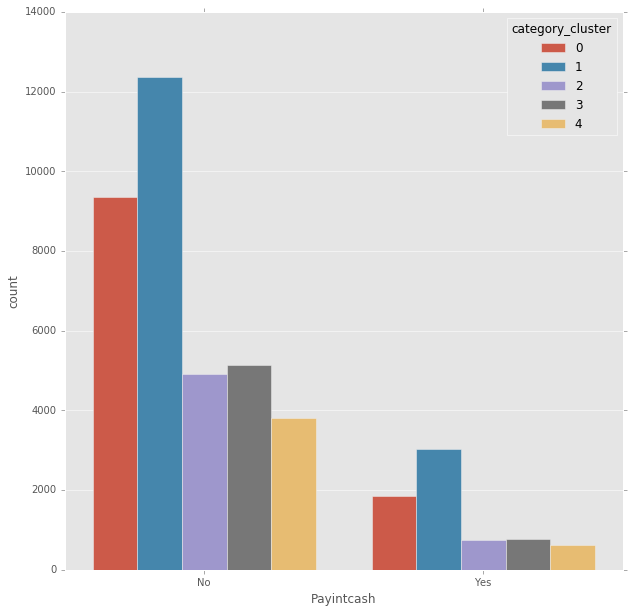

In [97]:
sns.countplot(x='Payintcash', data=df, hue='category_cluster')

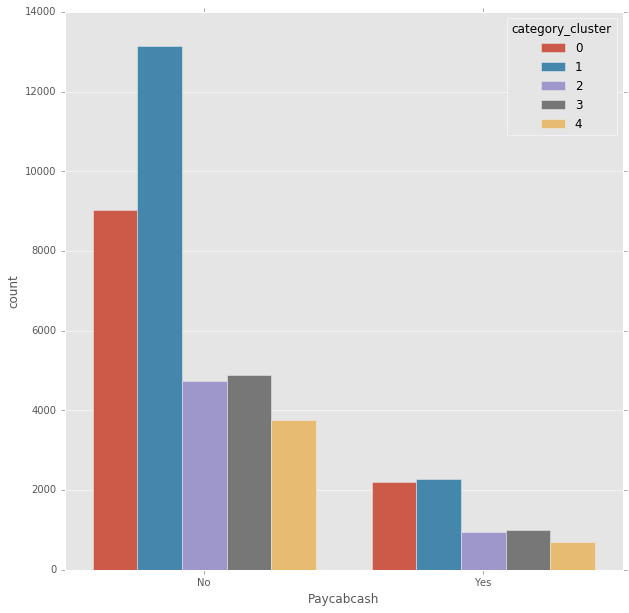

In [98]:
sns.countplot(x='Paycabcash', data=df, hue='category_cluster')

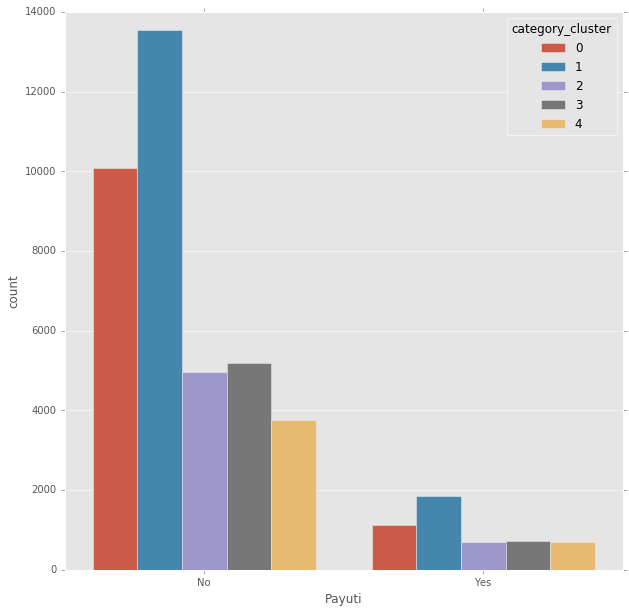

In [115]:
sns.countplot(x='Payuti', data=df, hue='category_cluster')

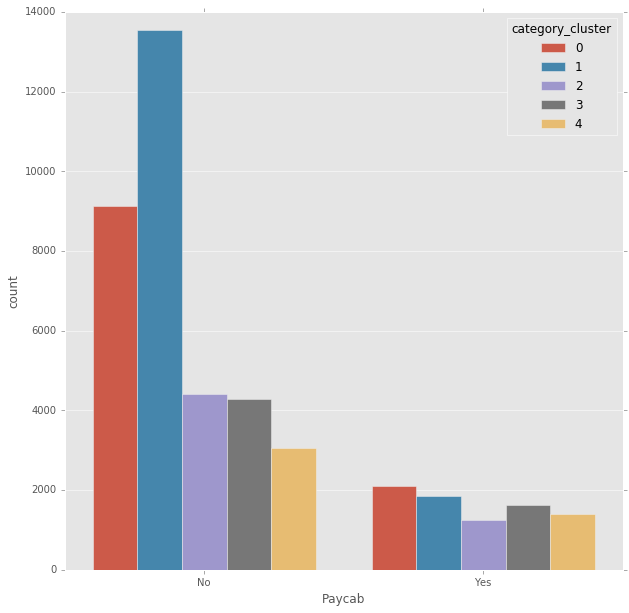

In [116]:
sns.countplot(x='Paycab', data=df, hue='category_cluster')

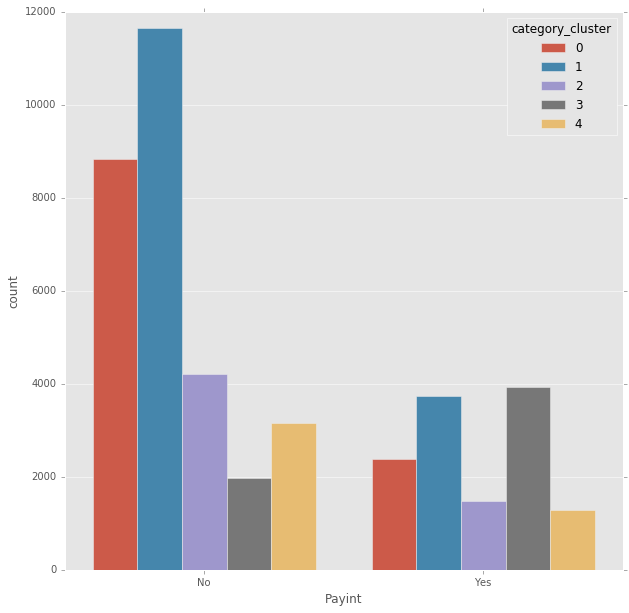

In [119]:
sns.countplot(x='Payint', data=df, hue='category_cluster')

In [107]:
data['category_cluster'] = km.labels_

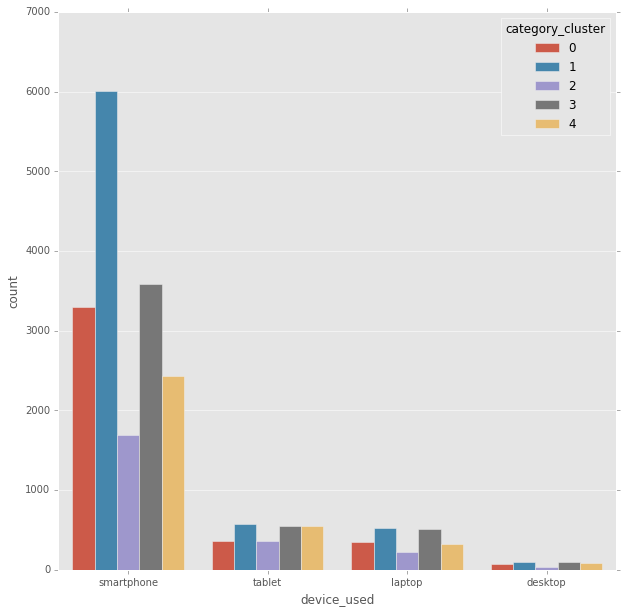

In [109]:
sns.countplot(x='device_used', data=data, hue='category_cluster')

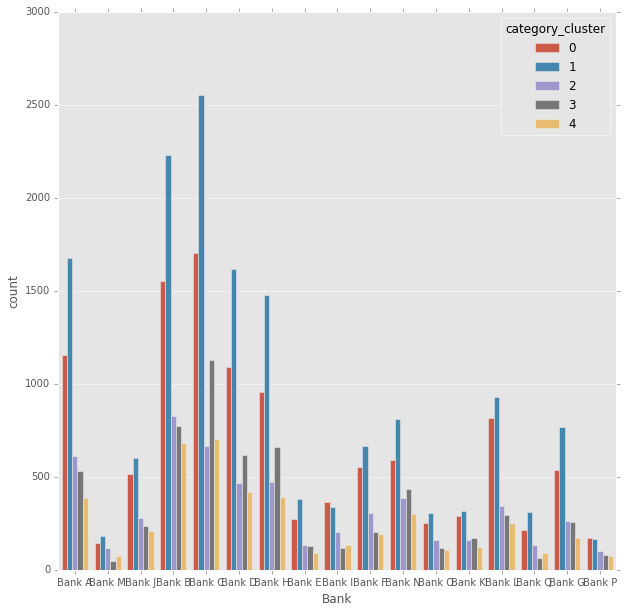

In [111]:
sns.countplot(x='Bank', data=data, hue='category_cluster')